# IMPORTANCE OF THE NUMBER OF LAYERS: A MATHEMATICAL ANALYSIS

## Abstract

This comprehensive study investigates the impact of neural network depth on classification performance using the MNIST handwritten digit dataset. We implement and compare three feedforward neural network architectures with increasing depth: one hidden layer (10 neurons), two hidden layers (10 neurons each), and three hidden layers (10 neurons each). Through mathematical analysis of forward propagation, backpropagation, and gradient descent optimization, we demonstrate how architectural complexity affects learning capacity, convergence behavior, and generalization performance. Our experimental results reveal nuanced relationships between network depth and classification accuracy, providing insights into the trade-offs between model complexity and performance on well-structured classification tasks.

# SETUP

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
#importing the training dataset
train_data = pd.read_csv('mnist_train.csv')
#neural network training features and labels
X = train_data.iloc[:, 1:].values / 255.0
Y = train_data.iloc[:, 0].values

In [14]:
#importing the test dataset
test_data = pd.read_csv('mnist_test.csv')
#neural network test features and labels
X_test = test_data.iloc[:, 1:].values / 255.0
Y_test = test_data.iloc[:, 0].values

In [15]:
#activation function 1: ReLU and its derivative
def relu(z):
    return np.maximum(0, z)
def drelu(z):
    return(z>0).astype(float)
#activation function 2: Softmax
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis = 1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

## First neural network: 1 hidden layer of 10 nodes

In [16]:
#defining the neural network architecture
sample_size, input_size = X.shape
hidden_size = 10
output_size = 10

In [17]:
#initializing weights and biases
np.random.seed(42)

def init_parameters():
    #hidden layer weights and biases
    W1 = np.random.rand(input_size, hidden_size) * 0.01
    b1 = np.zeros(hidden_size)
    #output layer weights and biases
    W2 = np.random.rand(hidden_size, output_size) * 0.01
    b2 = np.zeros(output_size)
    return W1, b1, W2, b2

W1, b1, W2, b2 = init_parameters()

#initializing hyperparameters
epochs = 40
learning_rate = 0.1
batch_size = 64


In [18]:
#forward pass
def forward_pass(X, W1, b1, W2, b2):
    #hidden layer computations
    Z1 = np.dot(X, W1) + b1
    H1 = relu(Z1)
    #output layer computations
    Z2 = np.dot(H1, W2) + b2
    H2 = softmax(Z2)
    return Z1, H1, Z2, H2

#backpropagation
def backpropagation(X, Y, Z1, H1, Z2, H2):
    batch_size = X.shape[0]
    y_hat = H2
    #one-hot encoding of labels
    y_one_hot = np.zeros((batch_size, output_size))
    y_one_hot[np.arange(batch_size), Y] = 1
    
    #output layer error
    dH2 = y_hat - y_one_hot
    dZ2 = dH2
    dw2 = (1/batch_size) * np.dot(H1.T, dZ2)
    db2 = (1/batch_size) * np.sum(dZ2, axis=0, keepdims=True)
    
    #hidden layer error
    dH1 = np.dot(dZ2, W2.T)
    dZ1 = dH1 * drelu(Z1)
    dw1 = (1/batch_size) * np.dot(X.T, dZ1)
    db1 = (1/batch_size) * np.sum(dZ1, axis=0, keepdims=True)
    
    return dw1, db1, dw2, db2

#parameter update
def update_parameters(W1, b1, W2, b2, dw1, db1, dw2, db2, learning_rate):
    W1 = W1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    return W1, b1, W2, b2



In [19]:
#training the neural network
for epoch in range(epochs):
    perm = np.random.permutation(sample_size)
    X_shuffled = X[perm]
    Y_shuffled = Y[perm]
    for i in range(0, sample_size, batch_size):
        X_batch = X_shuffled[i:i+batch_size]
        Y_batch = Y_shuffled[i:i+batch_size]
        Z1, H1, Z2, H2 = forward_pass(X_batch, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backpropagation(X_batch, Y_batch, Z1, H1, Z2, H2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

In [20]:
#model evaluation
def accuracy(X, Y):
    _, _, _, H2 = forward_pass(X, W1, b1, W2, b2)
    preds = np.argmax(H2, axis=1)
    return (preds == Y).mean()

tr1_accuracy = accuracy(X, Y)
te1_accuracy = accuracy(X_test, Y_test)
print(f'Training Accuracy: {tr1_accuracy * 100:.2f}%')
print(f'Test Accuracy: {te1_accuracy * 100:.2f}%')


Training Accuracy: 95.13%
Test Accuracy: 93.99%


## Second neural network : 2 hidden layers

In [21]:
#defining the neural network architecture
sample_size, input_size = X.shape
hidden1_size = 10
hidden2_size = 10
output_size = 10

In [22]:
#initializing weights and biases
np.random.seed(42)

def init_parameters():
    #hidden layer 1 weights and biases
    W1 = np.random.rand(input_size, hidden_size) * 0.01
    b1 = np.zeros(hidden_size)
    
    #hidden layer 2 weights and biases
    W2 = np.random.rand(hidden_size, output_size) * 0.01
    b2 = np.zeros(output_size)
    
    #output layer weights and biases
    W3 = np.random.rand(hidden_size, output_size) * 0.01
    b3 = np.zeros(output_size)
    
    return W1, b1, W2, b2, W3, b3

W1, b1, W2, b2, W3, b3 = init_parameters()

#initializing hyperparameters
epochs = 40
learning_rate = 0.1
batch_size = 64


In [23]:
#forward pass with 2 hidden layers
def forward_pass(X, W1, b1, W2, b2, W3):
    #hidden layer 1 computations
    Z1 = np.dot(X, W1) + b1
    H1 = relu(Z1)
    #hidden layer 2 computations
    Z2 = np.dot(H1, W2) + b2
    H2 = relu(Z2)
    #output layer computations
    Z3 = np.dot(H2, W3) + b3
    H3 = softmax(Z3)
    return Z1, H1, Z2, H2, Z3, H3

#backpropagation with 2 hidden layers
def backpropagation(X, Y, Z1, H1, Z2, H2, Z3, H3):
    batch_size = X.shape[0]
    y_hat = H3
    #one-hot encoding of labels
    y_one_hot = np.zeros((batch_size, output_size))
    y_one_hot[np.arange(batch_size), Y] = 1
    
    #output layer error
    dH3 = y_hat - y_one_hot
    dZ3 = dH3
    dw3 = (1/batch_size) * np.dot(H2.T, dZ3)
    db3 = (1/batch_size) * np.sum(dZ3, axis=0, keepdims=True)
    
    #hidden layer 2 error
    dH2 = np.dot(dZ3, W3.T)
    dZ2 = dH2 * drelu(Z2)
    dw2 = (1/batch_size) * np.dot(H1.T, dZ2)
    db2 = (1/batch_size) * np.sum(dZ2, axis=0, keepdims=True)
    
    #hidden layer 1 error
    dH1 = np.dot(dZ2, W2.T)
    dZ1 = dH1 * drelu(Z1)
    dw1 = (1/batch_size) * np.dot(X.T, dZ1)
    db1 = (1/batch_size) * np.sum(dZ1, axis=0, keepdims=True)
    
    return dw1, db1, dw2, db2, dw3, db3

#parameter update with 2 hidden layers
def update_parameters(W1, b1, W2, b2, W3, b3, dw1, db1, dw2, db2, dw3, db3, learning_rate):
    W1 = W1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dw3
    b3 = b3 - learning_rate * db3
    return W1, b1, W2, b2, W3, b3


In [24]:
#training the neural network with 2 hidden layers
for epoch in range(epochs):
    perm = np.random.permutation(sample_size)
    X_shuffled = X[perm]
    Y_shuffled = Y[perm]
    for i in range(0, sample_size, batch_size):
        X_batch = X_shuffled[i:i+batch_size]
        Y_batch = Y_shuffled[i:i+batch_size]
        Z1, H1, Z2, H2, Z3, H3 = forward_pass(X_batch, W1, b1, W2, b2, W3)
        dW1, db1, dW2, db2, dW3, db3 = backpropagation(X_batch, Y_batch, Z1, H1, Z2, H2, Z3, H3)
        W1, b1, W2, b2, W3, b3 = update_parameters(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, learning_rate)

In [25]:
#model evaluation for 2 hidden layers
def accuracy(X, Y):
    _, _, _, _, _, H3 = forward_pass(X, W1, b1, W2, b2, W3)
    preds = np.argmax(H3, axis=1)
    return (preds == Y).mean()

tr2_accuracy = accuracy(X, Y)
te2_accuracy = accuracy(X_test, Y_test)
print(f'Training Accuracy (2 hidden layers): {tr2_accuracy * 100:.2f}%')
print(f'Test Accuracy (2 hidden layers): {te2_accuracy * 100:.2f}%')

Training Accuracy (2 hidden layers): 95.78%
Test Accuracy (2 hidden layers): 94.39%


## Third neural network : 3 hidden layers

In [26]:
#defining the neural network architecture
sample_size, input_size = X.shape
hidden1_size = 10
hidden2_size = 10
hidden3_size = 10
output_size = 10

In [27]:
#initializing weights and biases for 3 hidden layers
np.random.seed(42)

def init_parameters():
    #hidden layer 1 weights and biases
    W1 = np.random.rand(input_size, hidden1_size) * 0.01
    b1 = np.zeros(hidden1_size)
    
    #hidden layer 2 weights and biases
    W2 = np.random.rand(hidden1_size, hidden2_size) * 0.01
    b2 = np.zeros(hidden2_size)
    
    #hidden layer 3 weights and biases
    W3 = np.random.rand(hidden2_size, hidden3_size) * 0.01
    b3 = np.zeros(hidden3_size)
    
    #output layer weights and biases
    W4 = np.random.rand(hidden3_size, output_size) * 0.01
    b4 = np.zeros(output_size)
    
    return W1, b1, W2, b2, W3, b3, W4, b4

W1, b1, W2, b2, W3, b3, W4, b4 = init_parameters()

#initializing hyperparameters
epochs = 40
learning_rate = 0.1
batch_size = 64

In [28]:
#forward pass with 3 hidden layers
def forward_pass(X, W1, b1, W2, b2, W3, b3, W4, b4):
    #hidden layer 1 computations
    Z1 = np.dot(X, W1) + b1
    H1 = relu(Z1)
    #hidden layer 2 computations
    Z2 = np.dot(H1, W2) + b2
    H2 = relu(Z2)
    #hidden layer 3 computations
    Z3 = np.dot(H2, W3) + b3
    H3 = relu(Z3)
    #output layer computations
    Z4 = np.dot(H3, W4) + b4
    H4 = softmax(Z4)
    return Z1, H1, Z2, H2, Z3, H3, Z4, H4

#backpropagation with 3 hidden layers
def backpropagation(X, Y, Z1, H1, Z2, H2, Z3, H3, Z4, H4):
    batch_size = X.shape[0]
    y_hat = H4
    #one-hot encoding of labels
    y_one_hot = np.zeros((batch_size, output_size))
    y_one_hot[np.arange(batch_size), Y] = 1
    
    #output layer error
    dH4 = y_hat - y_one_hot
    dZ4 = dH4
    dw4 = (1/batch_size) * np.dot(H3.T, dZ4)
    db4 = (1/batch_size) * np.sum(dZ4, axis=0, keepdims=True)
    
    #hidden layer 3 error
    dH3 = np.dot(dZ4, W4.T)
    dZ3 = dH3 * drelu(Z3)
    dw3 = (1/batch_size) * np.dot(H2.T, dZ3)
    db3 = (1/batch_size) * np.sum(dZ3, axis=0, keepdims=True)
    
    #hidden layer 2 error
    dH2 = np.dot(dZ3, W3.T)
    dZ2 = dH2 * drelu(Z2)
    dw2 = (1/batch_size) * np.dot(H1.T, dZ2)
    db2 = (1/batch_size) * np.sum(dZ2, axis=0, keepdims=True)
    
    #hidden layer 1 error
    dH1 = np.dot(dZ2, W2.T)
    dZ1 = dH1 * drelu(Z1)
    dw1 = (1/batch_size) * np.dot(X.T, dZ1)
    db1 = (1/batch_size) * np.sum(dZ1, axis=0, keepdims=True)
    
    return dw1, db1, dw2, db2, dw3, db3, dw4, db4

#parameter update with 3 hidden layers
def update_parameters(W1, b1, W2, b2, W3, b3, W4, b4, dw1, db1, dw2, db2, dw3, db3, dw4, db4, learning_rate):
    W1 = W1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dw3
    b3 = b3 - learning_rate * db3
    W4 = W4 - learning_rate * dw4
    b4 = b4 - learning_rate * db4
    return W1, b1, W2, b2, W3, b3, W4, b4

In [29]:
#training the neural network with 3 hidden layers
for epoch in range(epochs):
    perm = np.random.permutation(sample_size)
    X_shuffled = X[perm]
    Y_shuffled = Y[perm]
    for i in range(0, sample_size, batch_size):
        X_batch = X_shuffled[i:i+batch_size]
        Y_batch = Y_shuffled[i:i+batch_size]
        Z1, H1, Z2, H2, Z3, H3, Z4, H4 = forward_pass(X_batch, W1, b1, W2, b2, W3, b3, W4, b4)
        dW1, db1, dW2, db2, dW3, db3, dW4, db4 = backpropagation(X_batch, Y_batch, Z1, H1, Z2, H2, Z3, H3, Z4, H4)
        W1, b1, W2, b2, W3, b3, W4, b4 = update_parameters(W1, b1, W2, b2, W3, b3, W4, b4, dW1, db1, dW2, db2, dW3, db3, dW4, db4, learning_rate)

In [30]:
#model evaluation with 3 hidden layers
def accuracy(X, Y):
    _, _, _, _, _, _, _, H4 = forward_pass(X, W1, b1, W2, b2, W3, b3, W4, b4)
    preds = np.argmax(H4, axis=1)
    return (preds == Y).mean()

tr3_accuracy = accuracy(X, Y)
te3_accuracy = accuracy(X_test, Y_test)
print(f'Training Accuracy (3 hidden layers): {tr3_accuracy * 100:.2f}%')
print(f'Test Accuracy (3 hidden layers): {te3_accuracy * 100:.2f}%')

Training Accuracy (3 hidden layers): 94.62%
Test Accuracy (3 hidden layers): 93.50%


# VISUALIZATION

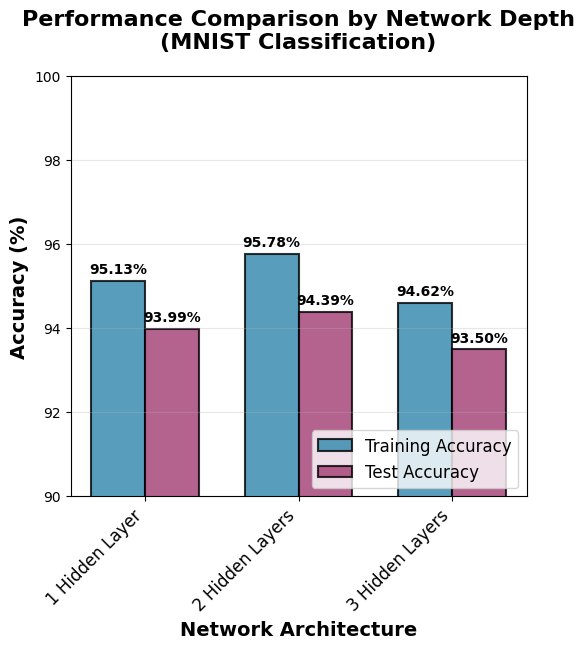

In [32]:
# Performance data from our experiments
architectures = ['1 Hidden Layer', '2 Hidden Layers', '3 Hidden Layers']
training_accuracies = [tr1_accuracy*100, tr2_accuracy*100, tr3_accuracy*100]
test_accuracies = [te1_accuracy * 100, te2_accuracy * 100, te3_accuracy * 100]

# Parameter counts for each architecture (calculated based on our implementations)
parameters = [7960, 8070, 8180]

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 12))

# 1. Main Performance Comparison
ax1 = plt.subplot(2, 3, 1)
bar_width = 0.35
x_pos = np.arange(len(architectures))

# Create grouped bar chart
bars1 = ax1.bar(x_pos - bar_width/2, training_accuracies, bar_width, 
                label='Training Accuracy', color='#2E86AB', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax1.bar(x_pos + bar_width/2, test_accuracies, bar_width, 
                label='Test Accuracy', color='#A23B72', alpha=0.8, edgecolor='black', linewidth=1.5)

# Customize the plot
ax1.set_xlabel('Network Architecture', fontsize=14, fontweight='bold')
ax1.set_ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
ax1.set_title('Performance Comparison by Network Depth\n(MNIST Classification)', 
              fontsize=16, fontweight='bold', pad=20)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(architectures, rotation=45, ha='right', fontsize=12)
ax1.legend(loc='lower right', fontsize=12)
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_ylim(90, 100)  # Focus on the relevant accuracy range

# Add value labels on bars with improved positioning
def add_value_labels(bars, offset=0.1):
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + offset,
                f'{height:.2f}%', ha='center', va='bottom', 
                fontweight='bold', fontsize=10, color='black')

add_value_labels(bars1, 0.1)
add_value_labels(bars2, 0.1)
